# Recommendation systems - lab2

In [1]:
import numpy as np
np.set_printoptions(precision=2)

In [2]:
data = """
3	7	4	9	9	7
7	5	5	3	8	8
7	5	5	0	8	4
5	6	8	5	9	8
5	8	8	8	10	9
7	7	8	4	7	8
"""

ratings = np.fromstring(data, sep='\t').reshape(6,6)

In [3]:
ratings[0] # row 0

array([3., 7., 4., 9., 9., 7.])

In [4]:
import math

def euclid_dist(u, v):
    #return math.sqrt(sum(map(lambda x: x**2, u-v)))
    return np.linalg.norm(u-v)

v = np.array([2, 3, 5, 7, 8])
u = np.array([2, 5, 7, 8, 8])
euclid_dist(u, v)

3.0

Compute the Euclidean distance between a row vector 1 X N and an
M x N matrix

In [5]:
A = np.array([
	[1, 4, 3, 3, 2],
	[3, 2, 1, 2, 2],
	[1, 3, 2, 2, 2],
	[1, 4, 5, 6, 7],
])


dist_from_v = lambda x: euclid_dist(v, x)
np.apply_along_axis(dist_from_v, 1, A)

array([7.62, 8.89, 8.43, 2.  ])

# Plotting

In [6]:
import matplotlib.pyplot as plt

In [7]:
ratings[:,2] # 3d column

array([4., 5., 5., 8., 8., 8.])

(-1, 10)

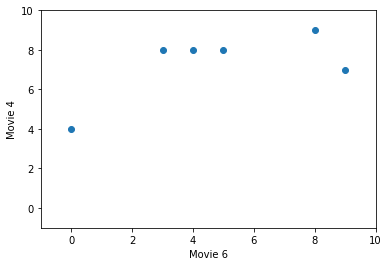

In [8]:
plt.scatter(ratings[:,3], ratings[:,5])
plt.ylabel('Movie 4')
plt.xlabel('Movie 6')
plt.ylim(-1, 10)
plt.xlim(-1, 10)

Now they want us to create distances between critics and each other

In [9]:
ratings

array([[ 3.,  7.,  4.,  9.,  9.,  7.],
       [ 7.,  5.,  5.,  3.,  8.,  8.],
       [ 7.,  5.,  5.,  0.,  8.,  4.],
       [ 5.,  6.,  8.,  5.,  9.,  8.],
       [ 5.,  8.,  8.,  8., 10.,  9.],
       [ 7.,  7.,  8.,  4.,  7.,  8.]])

In [10]:
ratings[0]

array([3., 7., 4., 9., 9., 7.])

In [11]:
def inspect(i, j):   
    return i+j


np.fromfunction(np.vectorize(inspect), (3, 3), dtype=int)

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [12]:
def get_distance(i, j):
    return euclid_dist(ratings[i], ratings[j])
    

critic_dist = np.fromfunction(np.vectorize(get_distance), (6,6), dtype=int)
critic_dist

array([[ 0.  ,  7.68, 10.58,  6.16,  5.2 ,  7.87],
       [ 7.68,  0.  ,  5.  ,  4.36,  7.21,  3.87],
       [10.58,  5.  ,  0.  ,  7.48, 10.72,  6.78],
       [ 6.16,  4.36,  7.48,  0.  ,  3.87,  3.16],
       [ 5.2 ,  7.21, 10.72,  3.87,  0.  ,  5.57],
       [ 7.87,  3.87,  6.78,  3.16,  5.57,  0.  ]])

# Actual thing

In [13]:
user_1 = np.array([None, None, None, 2, None, 7])
user_2 = np.array([None, 6, 9, None, None, 6])

In [14]:
user_1[[3,5]]

array([2, 7], dtype=object)

In [15]:
def partial_apply(func, u, v):
    """
        func(u, v) where u and v are columns with non-empty values
    """
    
    non_empty_columns = [i for i, x in enumerate(u) if x]
    
    u_filled = u[non_empty_columns]
    v_filled = v[non_empty_columns]    
    
    return func(u_filled, v_filled)

partial_apply(euclid_dist, user_1, ratings[0])

7.0

In [16]:
np.apply_along_axis(lambda x: partial_apply(euclid_dist, user_1, x), 1, ratings)

array([7.  , 1.41, 3.61, 3.16, 6.32, 2.24])

# Similarity measure:

In [17]:
def sim(u, v):
    return 1 / (1 + partial_apply(euclid_dist, u, v))


# How similar are critics to user 2

u2_sim = np.apply_along_axis(lambda x: sim(user_2, x), 1, ratings)
u2_sim

array([0.16, 0.18, 0.18, 0.31, 0.21, 0.29])

We want to multiply the rankings by the u2_sim - this way we get the score adjusted by how similar the user is to the critic.

In [18]:
u2_sim * ratings

array([[0.48, 1.25, 0.72, 2.78, 1.9 , 2.03],
       [1.13, 0.9 , 0.9 , 0.93, 1.69, 2.32],
       [1.13, 0.9 , 0.9 , 0.  , 1.69, 1.16],
       [0.81, 1.07, 1.43, 1.55, 1.9 , 2.32],
       [0.81, 1.43, 1.43, 2.47, 2.11, 2.61],
       [1.13, 1.25, 1.43, 1.24, 1.48, 2.32]])

In [19]:
# Now we want to sum the colums:

recommendations_user_2 = np.apply_along_axis(sum, 0, u2_sim * ratings) 
recommendations_user_2

array([ 5.49,  6.81,  6.81,  8.96, 10.76, 12.76])

In [20]:
# Now we want to normalize them:
recommendations_user_2 / sum(u2_sim)

array([4.13, 5.12, 5.12, 6.74, 8.09, 9.59])

this should be:
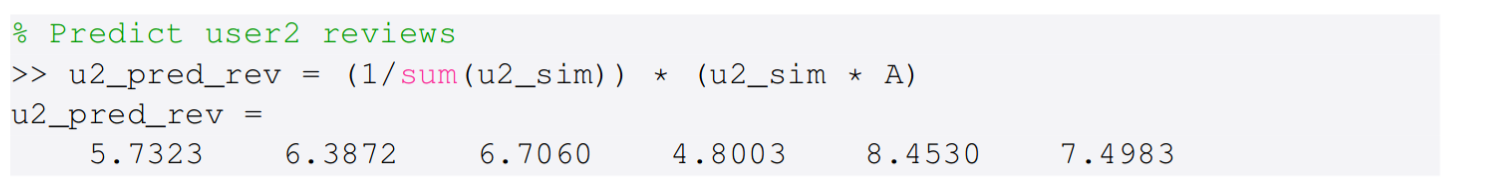